<a href="https://colab.research.google.com/github/bbalu907096/Superstore-Sales/blob/main/superstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
# Cell 1 — Install & Imports
!pip install --quiet plotly pandas seaborn matplotlib kaleido

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import display, HTML

# plotting defaults
plt.rcParams['figure.figsize'] = (12,5)
sns.set_theme(style='whitegrid')


In [68]:
# Cell 2 — Load dataset (adjust path if needed)
DATA_PATH = '/content/Superstore.csv'   # <-- your confirmed path

# existence check
if not os.path.exists(DATA_PATH):
    raise FileNotFoundError(f"File not found at {DATA_PATH}. Upload or change path.")

df = pd.read_csv(DATA_PATH, low_memory=False, encoding='latin1')
print("Loaded dataset shape:", df.shape)
df.head()

Loaded dataset shape: (9994, 21)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [69]:
# Cell 3 — Inspect & basic info
print("Columns:", df.columns.tolist())
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())

# show sample rows
display(df.sample(5, random_state=42))


Columns: ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']

Data types:
 Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

Missing values:
 Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country 

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3125,3126,CA-2015-121720,6/11/2015,6/12/2015,First Class,JE-15610,Jim Epp,Corporate,United States,Lakeland,...,33801,South,OFF-ST-10003816,Office Supplies,Storage,Fellowes High-Stak Drawer Files,563.808,4,0.2,21.1428
1441,1442,CA-2017-128160,12/19/2017,12/24/2017,Second Class,MM-17920,Michael Moore,Consumer,United States,San Francisco,...,94110,West,OFF-BI-10001510,Office Supplies,Binders,Deluxe Heavy-Duty Vinyl Round Ring Binder,36.672,2,0.2,11.4600
4510,4511,CA-2016-119935,11/10/2016,11/14/2016,Standard Class,KM-16225,Kalyca Meade,Corporate,United States,Springfield,...,65807,Central,FUR-FU-10001085,Furniture,Furnishings,3M Polarizing Light Filter Sleeves,37.300,2,0.0,17.1580
39,40,CA-2015-117415,12/27/2015,12/31/2015,Standard Class,SN-20710,Steve Nguyen,Home Office,United States,Houston,...,77041,Central,FUR-CH-10004218,Furniture,Chairs,"Global Fabric Manager's Chair, Dark Gray",212.058,3,0.3,-15.1470
4509,4510,CA-2017-167003,5/23/2017,5/29/2017,Standard Class,VS-21820,Vivek Sundaresam,Consumer,United States,Los Angeles,...,90036,West,FUR-TA-10001520,Furniture,Tables,"Lesro Sheffield Collection Coffee Table, End T...",171.288,3,0.2,-6.4233


In [70]:
# Cell 4 — Clean & convert types
# Trim column names
df.columns = [c.strip() for c in df.columns]

# Convert date columns if present
for col in ['Order Date', 'Ship Date', 'OrderDate', 'ShipDate']:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

# Unified names
if 'Order Date' in df.columns:
    df['OrderDate'] = df['Order Date']
if 'Ship Date' in df.columns:
    df['ShipDate'] = df['Ship Date']

# Numeric conversions (remove $ , etc.)
for col in ['Sales','Profit','Quantity','Discount']:
    if col in df.columns:
        df[col] = (df[col].astype(str)
                          .str.replace(r'[\$,]', '', regex=True)
                          .replace('', np.nan))
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop exact duplicate rows
df = df.drop_duplicates().reset_index(drop=True)

print("After cleaning shape:", df.shape)
df.info()


After cleaning shape: (9994, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object  

In [71]:
# Cell 5 — Feature engineering
# Time features
if 'OrderDate' in df.columns:
    df['Year'] = df['OrderDate'].dt.year
    df['Month'] = df['OrderDate'].dt.month
    df['MonthName'] = df['OrderDate'].dt.strftime('%b')
    df['OrderQuarter'] = df['OrderDate'].dt.to_period('Q').astype(str)
else:
    print("OrderDate not found — time features skipped.")

# Profit margin
if set(['Sales','Profit']).issubset(df.columns):
    df['ProfitMargin'] = df['Profit'] / df['Sales']
    df['ProfitMargin'] = df['ProfitMargin'].replace([np.inf, -np.inf], np.nan)

# Basic RFM if Customer ID exists
if 'Customer ID' in df.columns and 'OrderDate' in df.columns:
    snapshot_date = df['OrderDate'].max() + pd.Timedelta(days=1)
    recency = df.groupby('Customer ID')['OrderDate'].max().apply(lambda d: (snapshot_date - d).days)
    frequency = df.groupby('Customer ID')['Order ID'].nunique() if 'Order ID' in df.columns else df.groupby('Customer ID').size()
    monetary = df.groupby('Customer ID')['Sales'].sum()
    rfm = pd.concat([recency, frequency, monetary], axis=1).reset_index()
    rfm.columns = ['Customer ID','Recency','Frequency','Monetary']
    display(rfm.head())


,Customer ID,Recency,Frequency,Monetary
0,AA-10315,185,5,5563.560
1,AA-10375,20,9,1056.390
2,AA-10480,260,4,1790.512
3,AA-10645,56,6,5086.935
4,AB-10015,416,3,886.156


In [72]:
# Cell 6 — Summary KPIs
total_sales = df['Sales'].sum() if 'Sales' in df.columns else 0
total_profit = df['Profit'].sum() if 'Profit' in df.columns else 0
total_qty = int(df['Quantity'].sum()) if 'Quantity' in df.columns else np.nan

# Approx average order value
if 'Order ID' in df.columns:
    avg_order_value = df.groupby('Order ID')['Sales'].sum().mean()
else:
    avg_order_value = df['Sales'].mean() if 'Sales' in df.columns else 0

print("Total sales: ${:,.2f}".format(total_sales))
print("Total profit: ${:,.2f}".format(total_profit))
print("Total quantity sold:", total_qty)
print("Avg order value (approx): ${:,.2f}".format(avg_order_value if not pd.isna(avg_order_value) else 0))

# KPI HTML display
kpi_html = f"""
<div style="display:flex;gap:20px;font-family: Arial; margin: 8px 0;">
  <div style="padding:12px;border-radius:8px;background:#f7f9fc;">
    <div style="font-size:12px;color:#666;">Total Sales</div>
    <div style="font-size:20px;font-weight:700">${total_sales:,.0f}</div>
  </div>
  <div style="padding:12px;border-radius:8px;background:#f7f9fc;">
    <div style="font-size:12px;color:#666;">Total Profit</div>
    <div style="font-size:20px;font-weight:700">${total_profit:,.0f}</div>
  </div>
  <div style="padding:12px;border-radius:8px;background:#f7f9fc;">
    <div style="font-size:12px;color:#666;">Total Quantity</div>
    <div style="font-size:20px;font-weight:700">{total_qty}</div>
  </div>
  <div style="padding:12px;border-radius:8px;background:#f7f9fc;">
    <div style="font-size:12px;color:#666;">Avg Order Value</div>
    <div style="font-size:20px;font-weight:700">${avg_order_value:,.2f}</div>
  </div>
</div>
"""
display(HTML(kpi_html))


Total sales: $2,297,200.86
Total profit: $286,397.02
Total quantity sold: 37873
Avg order value (approx): $458.61


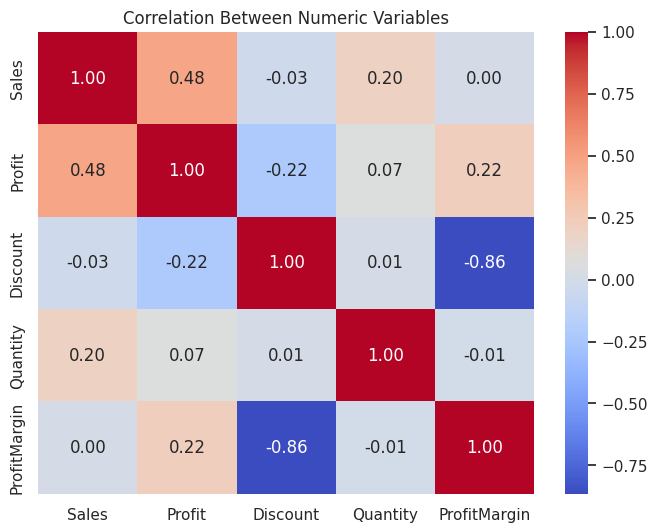

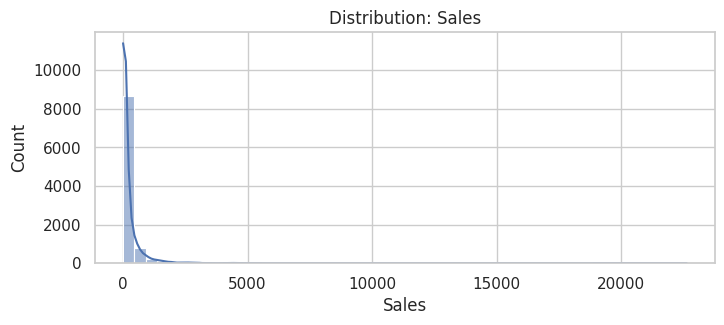

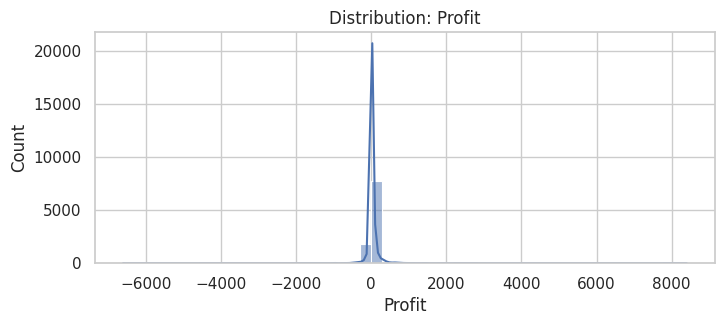

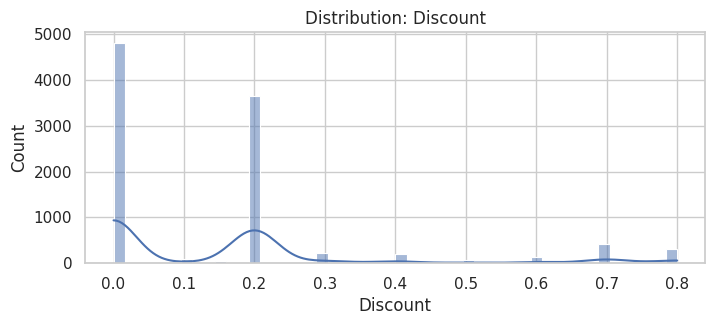

In [73]:
# Cell 7 — Correlation & distributions
num_cols = ['Sales','Profit','Discount','Quantity','ProfitMargin']
present_num_cols = [c for c in num_cols if c in df.columns]

if present_num_cols:
    plt.figure(figsize=(8,6))
    sns.heatmap(df[present_num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Between Numeric Variables")
    plt.show()

    for c in ['Sales','Profit','Discount']:
        if c in df.columns:
            plt.figure(figsize=(8,3))
            sns.histplot(df[c].dropna(), bins=50, kde=True)
            plt.title(f"Distribution: {c}")
            plt.show()


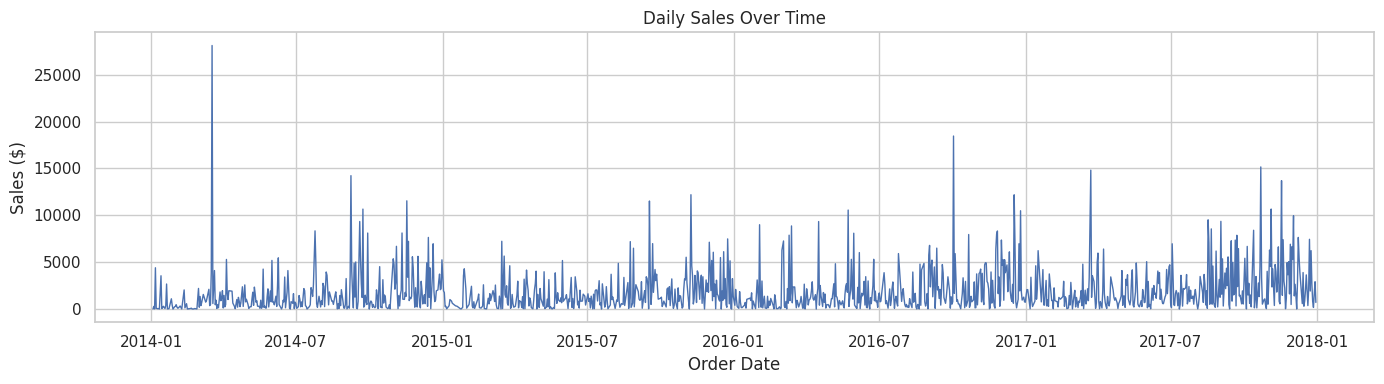

In [74]:
# Cell 8 — Sales trend over time (static)
if 'OrderDate' in df.columns:
    daily = df.groupby('OrderDate')['Sales'].sum().reset_index()
    plt.figure(figsize=(14,4))
    plt.plot(daily['OrderDate'], daily['Sales'], linewidth=1)
    plt.title("Daily Sales Over Time")
    plt.xlabel("Order Date")
    plt.ylabel("Sales ($)")
    plt.tight_layout()
    plt.show()
else:
    print("OrderDate missing — sales trend skipped.")


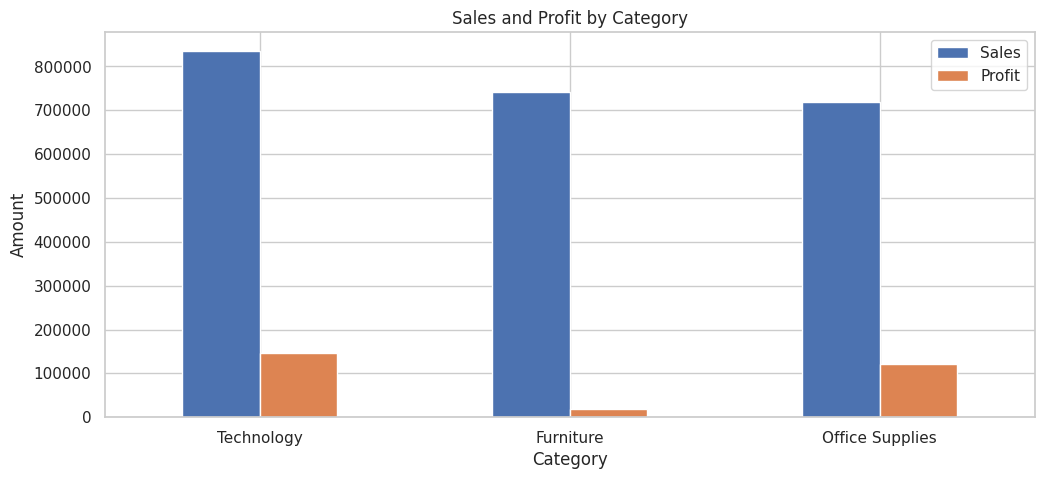

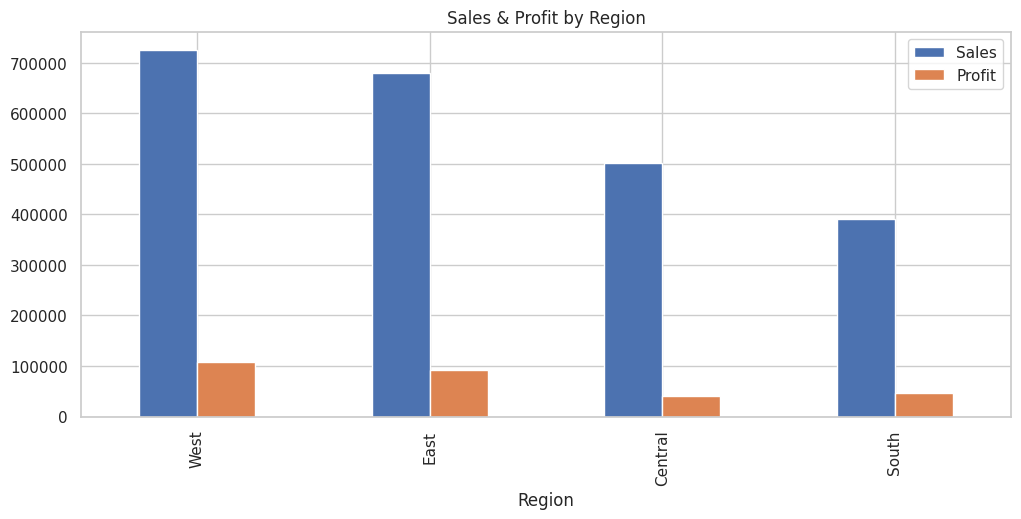

In [75]:
# Cell 9 — Category & Region analysis
if 'Category' in df.columns:
    cat = df.groupby('Category')[['Sales','Profit']].sum().sort_values('Sales', ascending=False)
    ax = cat.plot(kind='bar', rot=0)
    ax.set_ylabel("Amount")
    plt.title("Sales and Profit by Category")
    plt.show()

if 'Region' in df.columns:
    region = df.groupby('Region')[['Sales','Profit']].sum().sort_values('Sales', ascending=False)
    region.plot(kind='bar')
    plt.title("Sales & Profit by Region")
    plt.show()


Top 10 products by sales:


,Sales
Product Name,
Canon imageCLASS 2200 Advanced Copier,61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.384
Cisco TelePresence System EX90 Videoconferencing Unit,22638.480
HON 5400 Series Task Chairs for Big and Tall,21870.576
GBC DocuBind TL300 Electric Binding System,19823.479
GBC Ibimaster 500 Manual ProClick Binding System,19024.500
Hewlett Packard LaserJet 3310 Copier,18839.686
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",18374.895
GBC DocuBind P400 Electric Binding System,17965.068


Bottom 10 products by sales:


,Sales
Product Name,
Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac,1.624
Avery 5,5.760
Xerox 20,6.480
Grip Seal Envelopes,7.072
Avery Hi-Liter Pen Style Six-Color Fluorescent Set,7.700
"Avery Hi-Liter Comfort Grip Fluorescent Highlighter, Yellow Ink",7.800
Xerox 1989,7.968
4009 Highlighters,8.040
Stockwell Gold Paper Clips,8.096


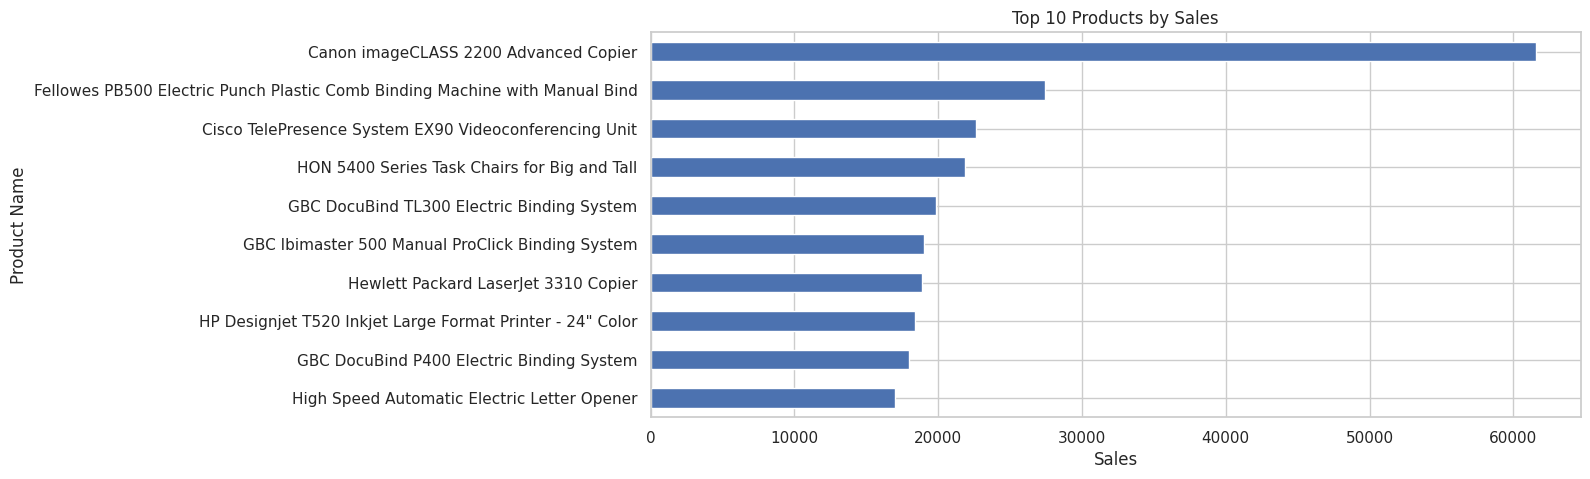

In [76]:
# Cell 10 — Top & bottom products
if 'Product Name' in df.columns and 'Sales' in df.columns:
    top10 = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
    bottom10 = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=True).head(10)
    print("Top 10 products by sales:")
    display(top10)
    print("Bottom 10 products by sales:")
    display(bottom10)

    # plot top 10
    top10.sort_values().plot(kind='barh')
    plt.title("Top 10 Products by Sales")
    plt.xlabel("Sales")
    plt.show()
else:
    print("Product Name or Sales column missing — skipping product analysis.")


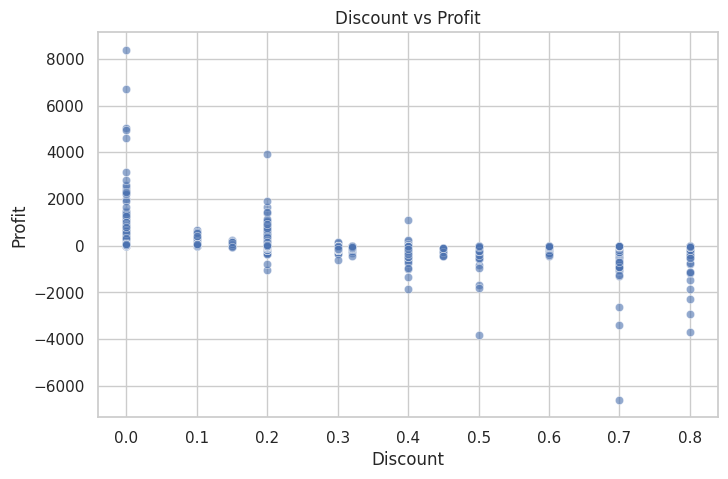

In [77]:
# Cell 11 — Discount vs Profit
if set(['Discount','Profit']).issubset(df.columns):
    plt.figure(figsize=(8,5))
    sns.scatterplot(data=df, x='Discount', y='Profit', alpha=0.6)
    plt.title("Discount vs Profit")
    plt.show()
else:
    print("Discount or Profit column missing — skipping scatter.")


In [78]:
# Cell 12 — Interactive Plotly visualizations
# Sales by Region (bar)
if 'Region' in df.columns:
    fig_region = px.bar(df.groupby('Region', as_index=False)['Sales'].sum().sort_values('Sales', ascending=False),
                 x='Region', y='Sales', title='Total Sales by Region', text_auto=True)
    fig_region.update_layout(margin=dict(l=20,r=20,t=40,b=20))
    fig_region.show()

# Treemap Category/Sub-Category
if set(['Category','Sub-Category','Sales']).issubset(df.columns):
    fig_treemap = px.treemap(df, path=['Category','Sub-Category'], values='Sales', title='Sales by Category/Sub-Category')
    fig_treemap.show()

# Monthly sales line with range slider
if 'OrderDate' in df.columns:
    monthly = df.set_index('OrderDate').resample('M')['Sales'].sum().reset_index()
    fig_monthly = px.line(monthly, x='OrderDate', y='Sales', title='Monthly Sales Trend')
    fig_monthly.update_xaxes(rangeslider_visible=True)
    fig_monthly.show()


/tmp/ipython-input-3115515076.py:16: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [79]:
# Cell 13 — Choropleth by State (US) — may need state abbreviations
if 'State' in df.columns and 'Profit' in df.columns:
    try:
        state_profit = df.groupby('State', as_index=False)['Profit'].sum()
        fig_state = px.choropleth(state_profit, locations='State', locationmode='USA-states',
                                  color='Profit', scope='usa', title='Profit by State')
        fig_state.show()
    except Exception as e:
        print("Choropleth failed (likely state name/abbrev mismatch). Error:", e)
else:
    print("State or Profit column missing — skipping choropleth.")


In [80]:
# Cell 14 — Combined interactive dashboard (summary)
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=("Monthly Sales","Sales by Region","Top Products (Sales)","Discount vs Profit"),
                    vertical_spacing=0.12)

# Monthly Sales
if 'OrderDate' in df.columns:
    monthly = df.set_index('OrderDate').resample('M')['Sales'].sum().reset_index()
    fig.add_trace(go.Scatter(x=monthly['OrderDate'], y=monthly['Sales'], name='Monthly Sales'), row=1, col=1)

# Sales by Region
if 'Region' in df.columns:
    region_df = df.groupby('Region', as_index=False)['Sales'].sum().sort_values('Sales', ascending=False)
    fig.add_trace(go.Bar(x=region_df['Region'], y=region_df['Sales'], name='Sales by Region'), row=1, col=2)

# Top Products
if 'Product Name' in df.columns:
    top10 = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(8).reset_index()
    fig.add_trace(go.Bar(x=top10['Sales'][::-1], y=top10['Product Name'][::-1], orientation='h', name='Top Products'), row=2, col=1)

# Discount vs Profit
if set(['Discount','Profit']).issubset(df.columns):
    fig.add_trace(go.Scatter(x=df['Discount'], y=df['Profit'], mode='markers', name='Discount vs Profit', marker=dict(size=6, opacity=0.6)), row=2, col=2)

fig.update_layout(height=800, showlegend=False, title_text="Superstore — Summary Dashboard")
fig.show()


/tmp/ipython-input-2348925857.py:8: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [81]:
# Cell 15 — Export interactive chart and cleaned data
out_html = "/content/superstore_dashboard.html"
try:
    fig.write_html(out_html, include_plotlyjs='cdn')
    print("Saved combined dashboard to:", out_html)
except Exception as e:
    print("Failed to save HTML:", e)

clean_path = "/content/superstore_cleaned.csv"
df.to_csv(clean_path, index=False)
print("Saved cleaned dataset to:", clean_path)

# If you want immediate download in Colab, uncomment below:
# from google.colab import files
# files.download(out_html)
# files.download(clean_path)


Saved combined dashboard to: /content/superstore_dashboard.html
Saved cleaned dataset to: /content/superstore_cleaned.csv


In [82]:
# Cell 16 — Quick insights (customizable)
if 'Category' in df.columns and 'Profit' in df.columns:
    best_cat = df.groupby('Category')['Profit'].sum().idxmax()
    worst_cat = df.groupby('Category')['Profit'].sum().idxmin()
    print(f"Most profitable category: {best_cat}")
    print(f"Least profitable category: {worst_cat}")

if 'Region' in df.columns:
    top_region = df.groupby('Region')['Sales'].sum().idxmax()
    print(f"Top region by sales: {top_region}")

print("\nNotebook run complete. Review the visualizations above and tweak filters/time windows as required.")


Most profitable category: Technology
Least profitable category: Furniture
Top region by sales: West

Notebook run complete. Review the visualizations above and tweak filters/time windows as required.


In [83]:
!pip install streamlit pandas plotly pyngrok --quiet


In [84]:
%%writefile app.py
import streamlit as st
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from io import BytesIO
from plotly.subplots import make_subplots


# Streamlit page setup
st.set_page_config(page_title="📊 Superstore Sales Dashboard", layout="wide")

# -------------------------------
# LOAD DATA
# -------------------------------
@st.cache_data
def load_data():
    try:
        df = pd.read_csv("/content/Superstore.csv", encoding='utf-8')
    except UnicodeDecodeError:
        df = pd.read_csv("/content/Superstore.csv", encoding='latin-1')

    df.columns = [c.strip() for c in df.columns]

    # Convert dates and create derived columns
    if 'Order Date' in df.columns:
        df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
    if 'Ship Date' in df.columns:
        df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')
    if 'Profit' in df.columns and 'Sales' in df.columns:
        df['ProfitMargin'] = df['Profit'] / df['Sales']

    return df

df = load_data()

# -------------------------------
# SIDEBAR FILTERS
# -------------------------------
st.sidebar.header("🔍 Filters")

regions = df['Region'].dropna().unique().tolist() if 'Region' in df.columns else []
categories = df['Category'].dropna().unique().tolist() if 'Category' in df.columns else []
sub_categories = df['Sub-Category'].dropna().unique().tolist() if 'Sub-Category' in df.columns else []

selected_region = st.sidebar.multiselect("Select Region(s)", regions, default=regions)
selected_category = st.sidebar.multiselect("Select Category(s)", categories, default=categories)
selected_sub_category = st.sidebar.multiselect("Select Sub-Category(s)", sub_categories, default=sub_categories)

if 'Order Date' in df.columns:
    min_date, max_date = df['Order Date'].min(), df['Order Date'].max()
    date_range = st.sidebar.date_input("Select Date Range", [min_date, max_date])

# -------------------------------
# FILTER DATA
# -------------------------------
filtered_df = df.copy()

if 'Region' in filtered_df.columns and selected_region:
    filtered_df = filtered_df[filtered_df['Region'].isin(selected_region)]
if 'Category' in filtered_df.columns and selected_category:
    filtered_df = filtered_df[filtered_df['Category'].isin(selected_category)]
if 'Sub-Category' in filtered_df.columns and selected_sub_category:
    filtered_df = filtered_df[filtered_df['Sub-Category'].isin(selected_sub_category)]

if 'Order Date' in filtered_df.columns and len(date_range) == 2:
    start_date, end_date = date_range
    filtered_df = filtered_df[
        (filtered_df['Order Date'] >= pd.to_datetime(start_date)) &
        (filtered_df['Order Date'] <= pd.to_datetime(end_date))
    ]

# -------------------------------
# DASHBOARD HEADER
# -------------------------------
st.title("📈 Superstore Sales Dashboard")

total_sales = filtered_df['Sales'].sum() if 'Sales' in filtered_df.columns else 0
total_profit = filtered_df['Profit'].sum() if 'Profit' in filtered_df.columns else 0
avg_margin = filtered_df['ProfitMargin'].mean() * 100 if 'ProfitMargin' in filtered_df.columns else 0

col1, col2, col3 = st.columns(3)
col1.metric("💰 Total Sales", f"${total_sales:,.0f}")
col2.metric("📊 Total Profit", f"${total_profit:,.0f}")
col3.metric("📈 Avg Profit Margin", f"{avg_margin:.2f}%")

st.markdown("---")

# -------------------------------
# CHARTS
# -------------------------------

# Combined interactive dashboard (summary)
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=("Monthly Sales","Sales by Region","Top Products (Sales)","Discount vs Profit"),
                    vertical_spacing=0.12)

# Monthly Sales
if 'Order Date' in filtered_df.columns:
    monthly = filtered_df.set_index('Order Date').resample('M')['Sales'].sum().reset_index()
    fig.add_trace(go.Scatter(x=monthly['Order Date'], y=monthly['Sales'], name='Monthly Sales'), row=1, col=1)

# Sales by Region
if 'Region' in filtered_df.columns:
    region_df = filtered_df.groupby('Region', as_index=False)['Sales'].sum().sort_values('Sales', ascending=False)
    fig.add_trace(go.Bar(x=region_df['Region'], y=region_df['Sales'], name='Sales by Region'), row=1, col=2)

# Top Products
if 'Product Name' in filtered_df.columns and 'Sales' in filtered_df.columns:
    top10 = filtered_df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(8).reset_index()
    fig.add_trace(go.Bar(x=top10['Sales'][::-1], y=top10['Product Name'][::-1], orientation='h', name='Top Products'), row=2, col=1)

# Discount vs Profit
if set(['Discount','Profit']).issubset(filtered_df.columns):
    fig.add_trace(go.Scatter(x=filtered_df['Discount'], y=filtered_df['Profit'], mode='markers', name='Discount vs Profit', marker=dict(size=6, opacity=0.6)), row=2, col=2)

fig.update_layout(height=800, showlegend=False, title_text="Superstore — Summary Dashboard")
st.plotly_chart(fig, use_container_width=True)


# Sales over time
st.subheader("📅 Sales Over Time")
if 'Order Date' in filtered_df.columns:
    trend = filtered_df.groupby('Order Date')[['Sales']].sum().reset_index()
    fig1 = px.line(trend, x='Order Date', y='Sales', markers=True, title="Sales Trend")
    st.plotly_chart(fig1, use_container_width=True)

# Sales by Region
st.subheader("🏙️ Sales by Region")
if 'Region' in filtered_df.columns:
    region_sales = filtered_df.groupby('Region')['Sales'].sum().reset_index()
    fig2 = px.bar(region_sales, x='Region', y='Sales', color='Region', title="Sales by Region")
    st.plotly_chart(fig2, use_container_width=True)

# Top 10 Products
st.subheader("🛍️ Top 10 Products by Sales")
if 'Product Name' in filtered_df.columns:
    top_products = filtered_df.groupby('Product Name')['Sales'].sum().nlargest(10).reset_index()
    fig3 = px.bar(top_products, x='Sales', y='Product Name', orientation='h',
                  title="Top 10 Products", color='Sales')
    st.plotly_chart(fig3, use_container_width=True)

# Profit treemap
st.subheader("💸 Profit by Category and Sub-Category")
if 'Category' in filtered_df.columns and 'Sub-Category' in filtered_df.columns:
    cat_profit = filtered_df.groupby(['Category', 'Sub-Category'])['Profit'].sum().reset_index()
    fig4 = px.treemap(cat_profit, path=['Category', 'Sub-Category'], values='Profit', title="Profit Distribution")
    st.plotly_chart(fig4, use_container_width=True)

st.markdown("---")

# -------------------------------
# DATA VIEWER + DOWNLOADS
# -------------------------------
with st.expander("🔎 View Filtered Data"):
    st.dataframe(filtered_df, use_container_width=True)

    # CSV
    csv = filtered_df.to_csv(index=False).encode('utf-8')
    st.download_button(
        label="⬇️ Download CSV",
        data=csv,
        file_name="Filtered_Superstore_Data.csv",
        mime="text/csv"
    )

    # Excel
    buffer = BytesIO()
    with pd.ExcelWriter(buffer, engine='xlsxwriter') as writer:
        filtered_df.to_excel(writer, index=False, sheet_name='Filtered Data')
    st.download_button(
        label="⬇️ Download Excel",
        data=buffer.getvalue(),
        file_name="Filtered_Superstore_Data.xlsx",
        mime="application/vnd.openxmlformats-officedocument.spreadsheetml.sheet"
    )

st.caption("📊 Built with Streamlit | Data: Superstore Dataset | Interactive Dashboard")

Overwriting app.py


In [85]:
!pip install -q xlsxwriter openpyxl


In [86]:
import xlsxwriter
import openpyxl
print("✅ Excel libraries installed successfully!")


✅ Excel libraries installed successfully!


In [87]:
!pip uninstall prophet -y


Found existing installation: prophet 1.2.1
Uninstalling prophet-1.2.1:
  Successfully uninstalled prophet-1.2.1


In [88]:
!pip install prophet==1.1.5 --quiet
!pip install cmdstanpy==1.2.0 --quiet


In [89]:
# ---------------- FORECAST MODEL (fallback) ----------------
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import plotly.graph_objects as go # Ensure go is imported

# st.subheader("⏱️ 30-Day Sales Forecast (Exponential Smoothing)") # Remove Streamlit command

forecast_df = df.groupby("Order Date")[["Sales"]].sum().reset_index()
if len(forecast_df) > 20:
    model = ExponentialSmoothing(forecast_df["Sales"], trend="add", seasonal=None)
    fit = model.fit()
    forecast = fit.forecast(30)
    forecast_dates = pd.date_range(forecast_df["Order Date"].max(), periods=30, freq="D")

    fig = go.Figure() # Use fig instead of fig2 to avoid confusion with app.py
    fig.add_trace(go.Scatter(x=forecast_df["Order Date"], y=forecast_df["Sales"], name="Actual Sales"))
    fig.add_trace(go.Scatter(x=forecast_dates, y=forecast, name="Forecast", line=dict(dash="dot")))
    fig.update_layout(title="30-Day Sales Forecast", xaxis_title="Date", yaxis_title="Sales")
    fig.show() # Use fig.show() to display in Colab

else:
    # st.warning("Not enough data for forecast.") # Remove Streamlit command
    print("Not enough data for forecast.") # Use print for Colab output

In [90]:
# Attempt to install potentially compatible versions of prophet and cmdstanpy
!pip install prophet --upgrade --quiet
!pip install cmdstanpy --upgrade --quiet

In [91]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [92]:
!ngrok config add-authtoken 32gRbNQaBQj70TVZ7RLVYhb1SMP_4BamL47uvBsCk6CrHGvJ7

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [94]:
from pyngrok import ngrok
ngrok.kill()
public_url = ngrok.connect(8501)
print("🌍 Public App URL:", public_url)
!streamlit run app.py --server.port 8501 &> /dev/null &


🌍 Public App URL: NgrokTunnel: "https://468458c0cc4e.ngrok-free.app" -> "http://localhost:8501"
